# Perform Minor 4 about Blood Donation Forecast with using classification method ( Logistic Regression )

  # step - 1 import libraries 

In [6]:
 step - 1 import libraries 

SyntaxError: invalid syntax (4112042333.py, line 1)

In [4]:
import pandas as pd
import numpy as np

# visulization 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Here we add libraries which are use in fute like model related or other...

In [32]:
from sklearn.model_selection import train_test_split

# step 2 - Load Datset 

In [9]:
raw_data = pd.read_csv(r'D:\Github_slash_mark_project\slash_mark_project\minor-4\dataset\transfusion.data')

In [11]:
raw_data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [14]:
# description  : 

<b>Dataset Description</b>

<p>Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to <a href="https://www.webmd.com/a-to-z-guides/blood-transfusion-what-to-know#1">WebMD</a>, "about 5 million Americans need a blood transfusion every year".</p>

<p>Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.</p>

<p>The data is stored in <code>datasets/transfusion.data</code> and it is structured according to RFMTC marketing model (a variation of RFM). We'll explore what that means later in this notebook. First, let's inspect the data.</p>

<p>Let's briefly return to our discussion of RFM model. RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.</p>
<p>RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:</p>
<ul>
<li>R (Recency - months since the last donation)</li>
<li>F (Frequency - total number of donation)</li>
<li>M (Monetary - total blood donated in c.c.)</li>
<li>T (Time - months since the first donation)</li>
<li>a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)</li>
</ul>
<p>It looks like every column in our DataFrame has the numeric type, which is exactly what we want when building a machine learning model. Let's verify our hypothesis.</p>

In [17]:
# check data type of data frame 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


here we can see that our data is alredy in int so we can go to next step buyt still we have to see that any null value available or not 

In [19]:
raw_data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

we can see that there are no any null value so we can go to next step

# step 3 - split data into independant and dependant varible

<b> Split into X and y </b>

<p> suppose we have x1 x2 x3 x4 x5 x6 x7 so on and ... we have target valus like y 

we have to classify or predict that column on basis of x1 to xn value than we can say that 

y --> dependant

X --> independant 

In [20]:
X = raw_data.drop('whether he/she donated blood in March 2007',axis=1)

In [21]:
X.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28


In [22]:
# here is our X means independant variable 

In [23]:
y = raw_data['whether he/she donated blood in March 2007']

In [28]:
y.head(2)

0    1
1    1
Name: whether he/she donated blood in March 2007, dtype: int64

<b>Checking whether he/she donated blood in March 2007 column</b>

<p>We want to predict whether or not the same donor will give blood the next time the vehicle comes to campus. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:</p>
<ul>
<li><code>0</code> - the donor will not give blood</li>
<li><code>1</code> - the donor will give blood</li>
</ul>
<p>Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.</p>


In [29]:
raw_data['whether he/she donated blood in March 2007'].value_counts(normalize=True)

0    0.762032
1    0.237968
Name: whether he/she donated blood in March 2007, dtype: float64

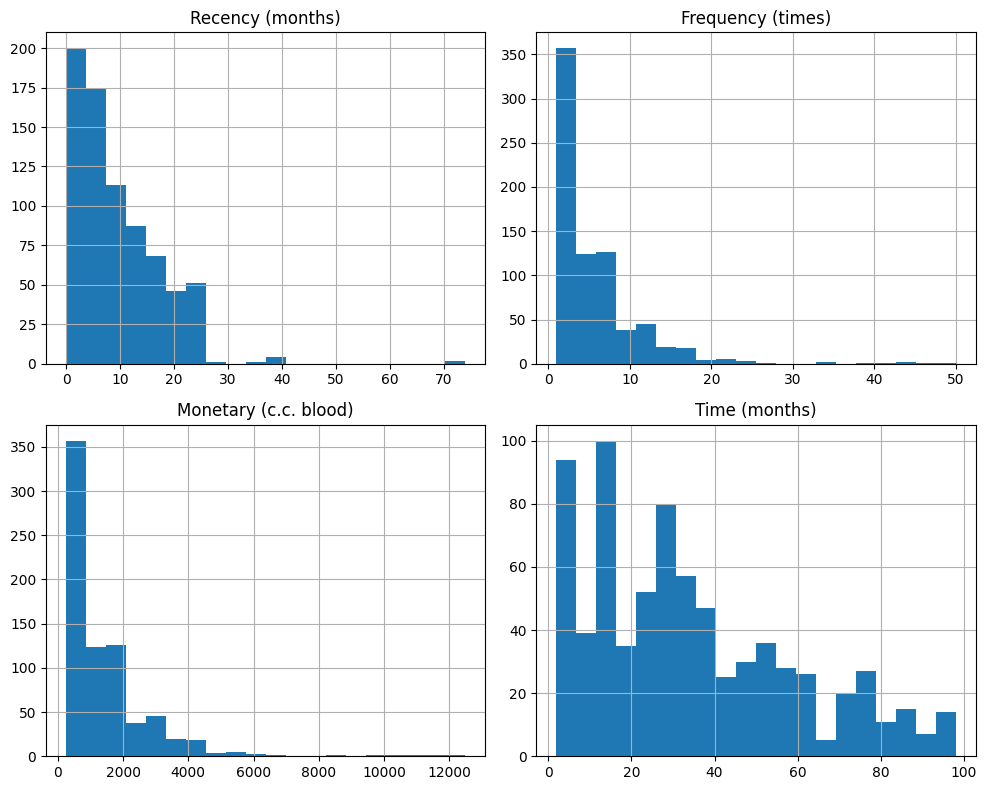

In [30]:
X.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

# step 4 - split data into train and test data 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=54,test_size=0.25)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((561, 4), (187, 4), (561,), (187,))

# Model 1 -- linear regression

In [36]:
 from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)

In [39]:
X_train

array([[ 0.69725275, -0.62235824, -0.62235824, -0.52904249],
       [ 0.2852175 ,  0.0776778 ,  0.0776778 ,  1.52063181],
       [-0.95088822, -0.27234022, -0.27234022, -0.32407506],
       ...,
       [-0.95088822,  0.0776778 ,  0.0776778 , -0.73400992],
       [ 0.69725275, -0.62235824, -0.62235824, -0.73400992],
       [-0.67619806,  0.60270482,  0.60270482,  0.49579466]])

In [40]:
X_test=scaler.transform(X_test)

In [41]:
X_test

array([[-6.76198062e-01, -7.97367253e-01, -7.97367253e-01,
        -1.22593175e+00],
       [-6.76198062e-01,  2.52780393e+00,  2.52780393e+00,
         1.43864483e+00],
       [-5.38852982e-01,  2.52686805e-01,  2.52686805e-01,
        -3.24075063e-01],
       [-9.50888224e-01,  9.52722844e-01,  9.52722844e-01,
         2.21752107e+00],
       [ 9.71942907e-01,  1.12773185e+00,  1.12773185e+00,
         6.59768601e-01],
       [-9.50888224e-01, -6.22358243e-01, -6.22358243e-01,
        -9.38977353e-01],
       [ 9.71942907e-01, -9.73312140e-02, -9.73312140e-02,
         1.52063181e+00],
       [-6.76198062e-01,  9.52722844e-01,  9.52722844e-01,
         2.50447547e+00],
       [ 6.97252745e-01,  2.17778591e+00,  2.17778591e+00,
         1.80758621e+00],
       [ 1.93335847e+00, -6.22358243e-01, -6.22358243e-01,
        -2.42088091e-01],
       [ 6.97252745e-01,  2.52686805e-01,  2.52686805e-01,
         4.54801171e-01],
       [ 2.85217503e-01,  1.82776789e+00,  1.82776789e+00,
      

In [43]:
# model 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score


In [44]:
regression = LinearRegression()

In [45]:
regression.fit(X_train,y_train)

LinearRegression()

In [46]:
mse = cross_val_score (regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [47]:
np.mean(mse)

-0.16336055205345143

In [48]:
reg_Pred=regression.predict(X_test)

In [49]:
reg_Pred

array([ 0.29759013,  0.52415263,  0.35178935,  0.25364482,  0.26048075,
        0.31858622,  0.01023661,  0.20384013,  0.326887  ,  0.01780497,
        0.17918193,  0.26829325,  0.16135966, -0.02003682,  0.19376933,
        0.14524638,  0.32786357,  0.40232646,  0.16966044,  0.94993388,
        0.186262  ,  0.33860575,  0.32523906,  0.34446513,  0.38358866,
        0.1315745 ,  0.03684794,  0.22092997,  0.01243388,  0.07346904,
        0.32786357,  0.19260966,  0.31101786,  0.18772685,  0.26609599,
        0.32786357,  0.32786357,  0.11741435,  0.18284404,  0.20628154,
        0.38358866,  0.24339091,  0.22581279,  0.24339091,  0.19846904,
        0.32786357,  0.03440654,  0.01243388,  0.22923075,  0.04221904,
        0.32786357, -0.08375753,  0.19016825,  0.32200419,  0.11741435,
        0.01243388,  0.04221904,  0.13987529,  0.27293193,  0.30540263,
        0.14671122,  0.01243388,  0.23118388,  0.11741435,  0.01243388,
        0.3034495 ,  0.28257548,  0.22483622,  0.13352763,  0.32

In [50]:
from sklearn.metrics import r2_score

In [51]:
score = r2_score(reg_Pred,y_test)

In [52]:
score

-3.243496691761698

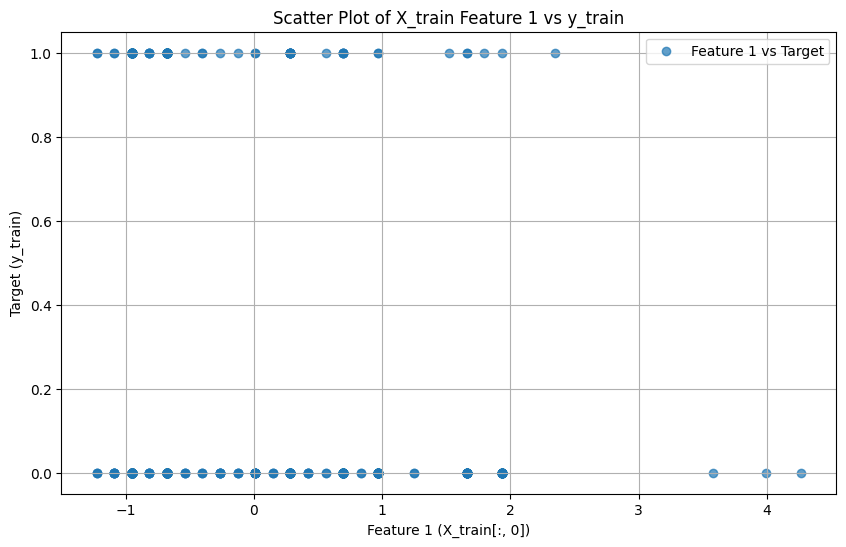

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train, alpha=0.7, label='Feature 1 vs Target')
plt.xlabel('Feature 1 (X_train[:, 0])')
plt.ylabel('Target (y_train)')
plt.title('Scatter Plot of X_train Feature 1 vs y_train')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# from  above graph we can say that our linear model not perform good becaouse it is not in linear nature so we have to switch in to logistic 


# Model - 2 - Logistica regression 

 why we use this model 

        --> we  only use this model because we can see that our put put in only 1 or 0 it like our main obgective is to classified into 1 or 0 so we have to classified

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [64]:
pred = lr.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.8021390374331551

In [67]:
lr.score(X_train, y_train)

0.7611408199643493

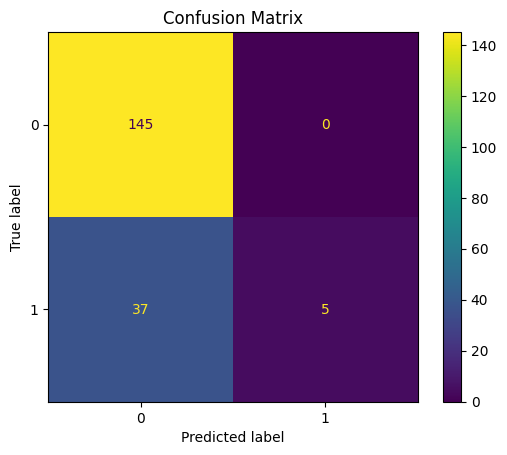

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()



In [72]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report (pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       182
           1       0.12      1.00      0.21         5

    accuracy                           0.80       187
   macro avg       0.56      0.90      0.55       187
weighted avg       0.98      0.80      0.87       187



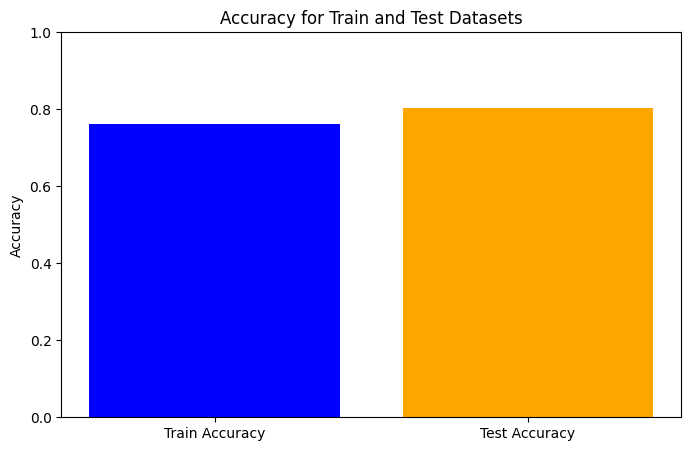

In [74]:
# Calculate accuracy for train and test datasets
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy for Train and Test Datasets')
plt.ylim(0, 1)
plt.show()

In [76]:
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)